<center>

# Esercizio 1

</center>

<span style="color:red">Change at will and train your DNN by increasing the number of epochs to an adeuqate value</span>. Try to use at least two other optimizers, different from SGD: <span style="color:red">watch to accuracy and loss for training and validation data and comment on the performances</span>.

In [49]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [50]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


In [51]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


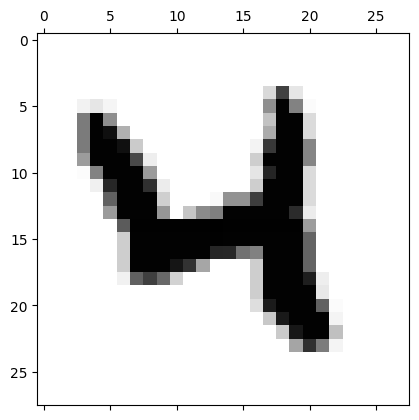

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [52]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [54]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adamax(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [55]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20


2023-07-10 16:59:52.137287: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 24s 12ms/step - loss: 0.2832 - acc: 0.9175 - val_loss: 0.1119 - val_acc: 0.9661
Epoch 2/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1224 - acc: 0.9648 - val_loss: 0.0882 - val_acc: 0.9726
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0857 - acc: 0.9748 - val_loss: 0.0892 - val_acc: 0.9726
Epoch 4/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0675 - acc: 0.9802 - val_loss: 0.0776 - val_acc: 0.9773
Epoch 5/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0564 - acc: 0.9830 - val_loss: 0.0733 - val_acc: 0.9803
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0473 - acc: 0.9859 - val_loss: 0.0774 - val_acc: 0.9782
Epoch 7/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0393 - acc: 0.9879 - val_loss: 0.0733 - val_acc: 0.9808
Epoch 8/20
1875/1875 [==============================] - 20s

313/313 [==============================] - 1s 2ms/step - loss: 0.1541 - acc: 0.9796

Test loss: 0.15413308143615723
Test accuracy: 0.9796000123023987


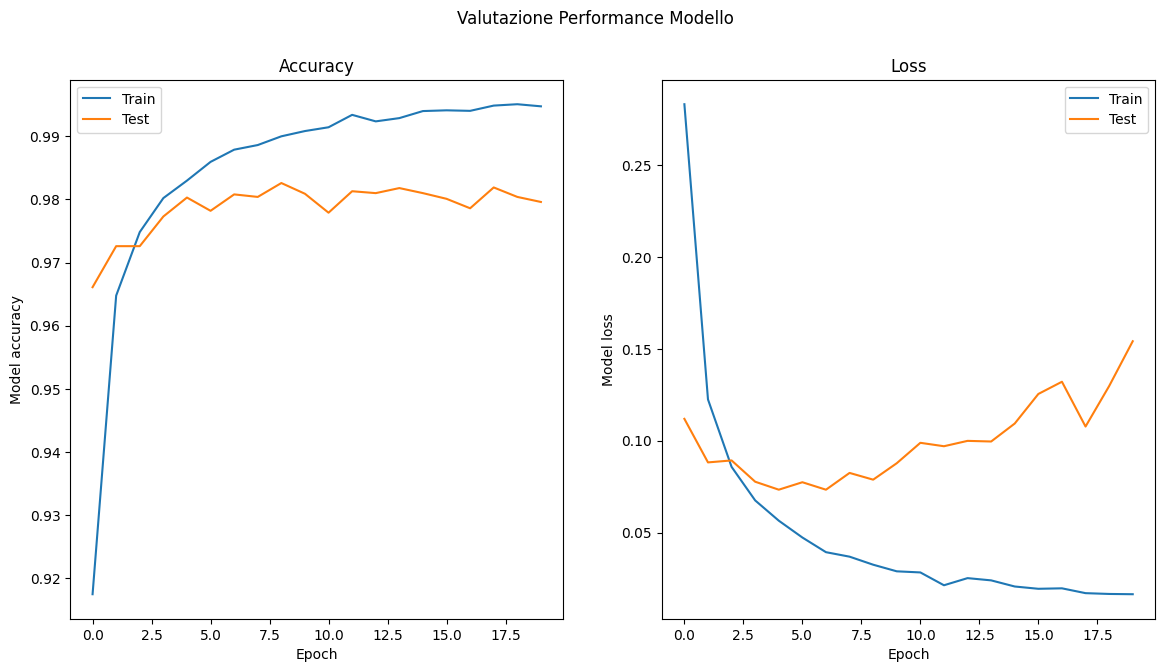

In [56]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, ax = plt.subplots(1,2, figsize = (14, 7))

appo = history.history['acc']
pippo = history.history['val_acc']
cont1 = history.history['loss']
cont2 = history.history['val_loss']

for i in range(0, 2):
    if i==0:
        # summarize history for accuracy
        ax[i].plot(appo)
        ax[i].plot(pippo)
        ax[i].set_ylabel('Model accuracy')
        ax[i].set_title('Accuracy')

    else:
        # summarize history for loss
        ax[i].plot(cont1)
        ax[i].plot(cont2)
        ax[i].set_ylabel('Model loss')
        ax[i].set_title('Loss')

    ax[i].set_xlabel('Epoch')
    ax[i].legend(['Train', 'Test'], loc='best')

fig.suptitle("Valutazione Performance Modello")
plt.show()

In [57]:
#Stampo Accuracy

#file = open('acc.dat', 'w')

#for i in range(0, len(appo)):
    #file.write(str(appo[i]) + "  ")

#file.write('\n')

#for i in range(0, len(pippo)):
    #file.write(str(pippo[i]) + "  ")

#file.write('\n')
#file.close()


#Stampo predizioni modello
#file = open('loss.dat', 'w')

#file.write('\n')

#for i in range(0, len(cont1)):
    #file.write(str(cont1[i]) + "  ")

#file.write('\n')

#for i in range(0, len(cont2)):
    #appo = str(cont2[i])
    #appo = appo.strip('[]')
    #file.write(str(appo) + "    ")

#file.write('\n')
#file.close()

313/313 [==============================] - 1s 2ms/step


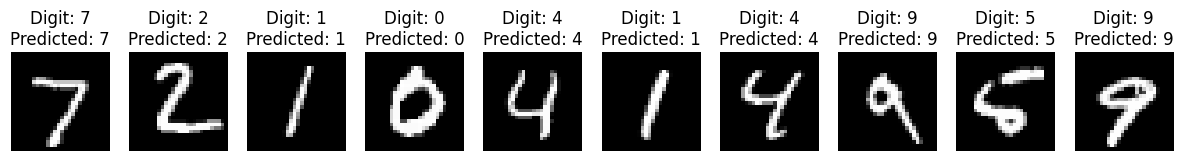

In [58]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Scelgo di lavorare con 20 epoche.

In [60]:
loss = np.loadtxt("Esercizio_1/Loss.dat")
acc = np.loadtxt("Esercizio_1/Acc.dat")

### SGD

Utilizzo SGD come metodo di ottimizzazione per 20 epoche. Ottengo allora che: <br>
$$
\begin{cases}
    T_{loss}\,=\,0.07660095393657684 \\
    T_{acc}\,=\,0.9764000177383423
\end{cases}
$$

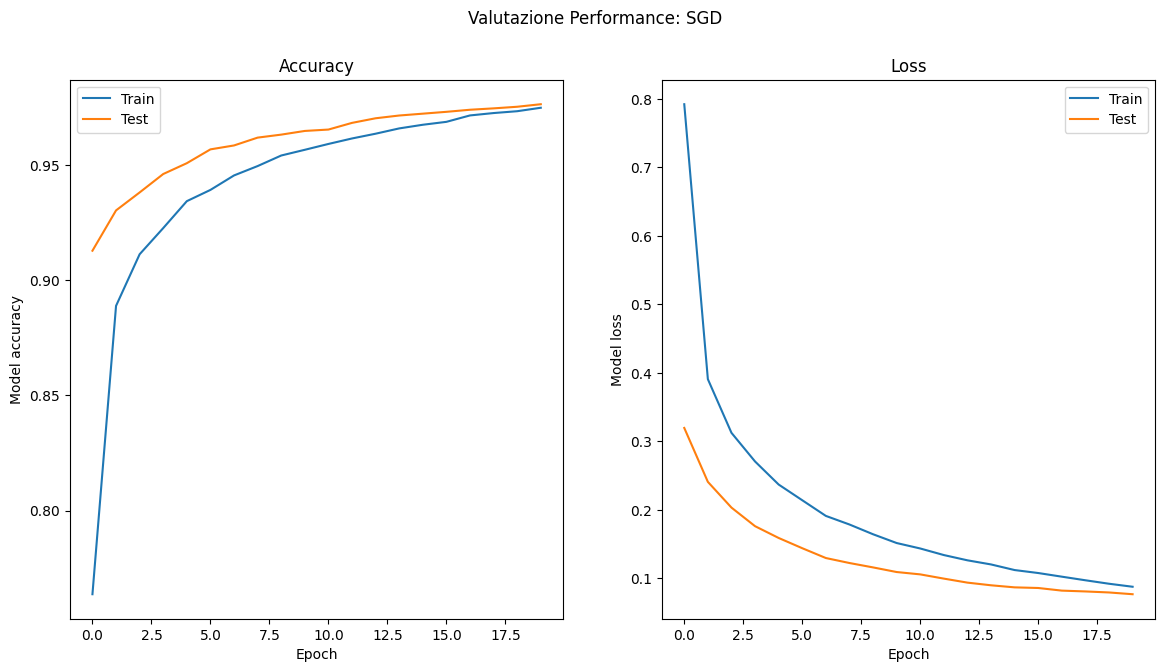

In [63]:
# look into training history
fig, ax = plt.subplots(1,2, figsize = (14, 7))

for i in range(0, 2):
    if i==0:
        # summarize history for accuracy
        ax[i].plot(acc[0])
        ax[i].plot(acc[1])
        ax[i].set_ylabel('Model accuracy')
        ax[i].set_title('Accuracy')

    else:
        # summarize history for loss
        ax[i].plot(loss[0])
        ax[i].plot(loss[1])
        ax[i].set_ylabel('Model loss')
        ax[i].set_title('Loss')

    ax[i].set_xlabel('Epoch')
    ax[i].legend(['Train', 'Test'], loc='best')

fig.suptitle("Valutazione Performance: SGD")
plt.show()

### Adam

Utilizzo Adam come metodo di ottimizzazione per 20 epoche. Ottengo allora che: <br>
$$
\begin{cases}
    T_{loss}\,=\,0.11590702831745148 \\
    T_{acc}\,=\,0.9835000038146973
\end{cases}
$$

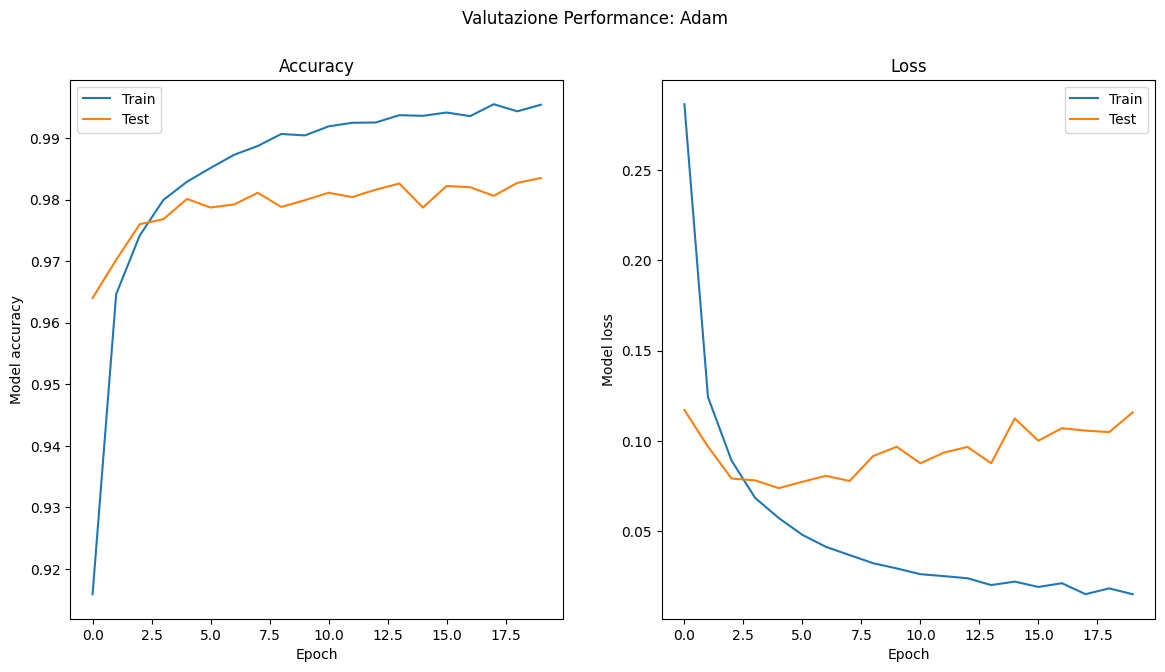

In [64]:
# look into training history
fig, ax = plt.subplots(1,2, figsize = (14, 7))

for i in range(0, 2):
    if i==0:
        # summarize history for accuracy
        ax[i].plot(acc[2])
        ax[i].plot(acc[3])
        ax[i].set_ylabel('Model accuracy')
        ax[i].set_title('Accuracy')

    else:
        # summarize history for loss
        ax[i].plot(loss[2])
        ax[i].plot(loss[3])
        ax[i].set_ylabel('Model loss')
        ax[i].set_title('Loss')

    ax[i].set_xlabel('Epoch')
    ax[i].legend(['Train', 'Test'], loc='best')

fig.suptitle("Valutazione Performance: Adam")
plt.show()

### RMSprop

Utilizzo RMSprop come metodo di ottimizzazione per 20 epoche. Ottengo allora che: <br>
$$
\begin{cases}
    T_{loss}\,=\,0.245376318693161 \\
    T_{acc}\,=\,0.978600025177002
\end{cases}
$$

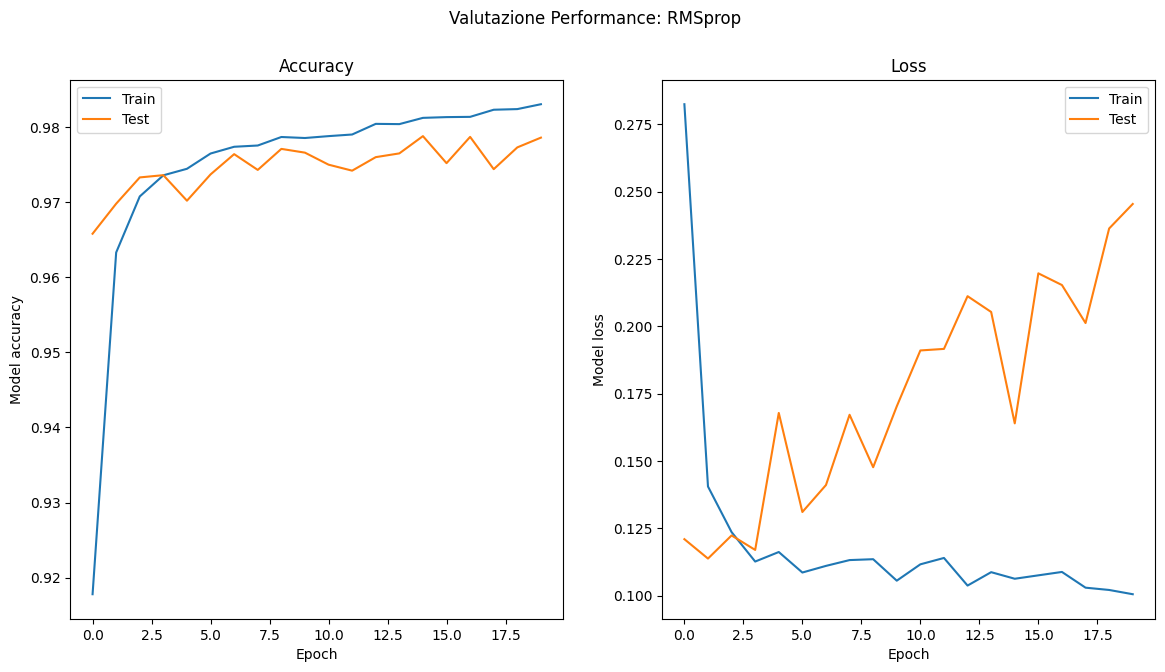

In [65]:
# look into training history
fig, ax = plt.subplots(1,2, figsize = (14, 7))

for i in range(0, 2):
    if i==0:
        # summarize history for accuracy
        ax[i].plot(acc[4])
        ax[i].plot(acc[5])
        ax[i].set_ylabel('Model accuracy')
        ax[i].set_title('Accuracy')

    else:
        # summarize history for loss
        ax[i].plot(loss[4])
        ax[i].plot(loss[5])
        ax[i].set_ylabel('Model loss')
        ax[i].set_title('Loss')

    ax[i].set_xlabel('Epoch')
    ax[i].legend(['Train', 'Test'], loc='best')

fig.suptitle("Valutazione Performance: RMSprop")
plt.show()

### Adagrad

Utilizzo Adagrad come metodo di ottimizzazione per 20 epoche. Ottengo allora che: <br>
$$
\begin{cases}
    T_{loss}\,=\,0.21115896105766296 \\
    T_{acc}\,=\,0.940500020980835
\end{cases}
$$

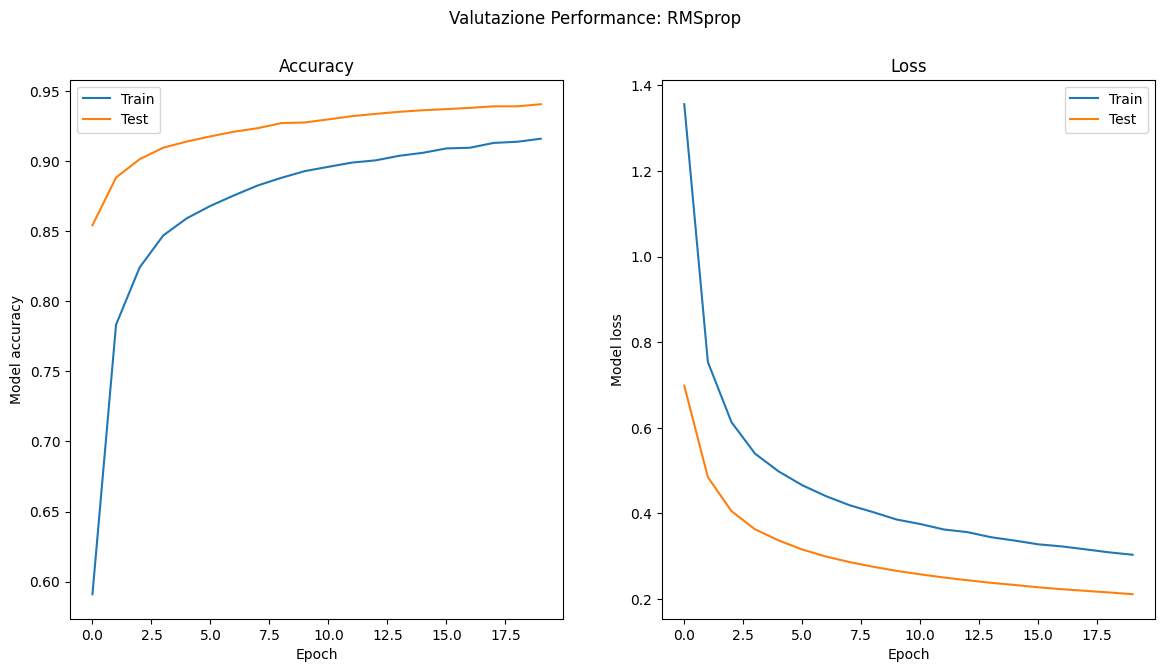

In [66]:
# look into training history
fig, ax = plt.subplots(1,2, figsize = (14, 7))

for i in range(0, 2):
    if i==0:
        # summarize history for accuracy
        ax[i].plot(acc[6])
        ax[i].plot(acc[7])
        ax[i].set_ylabel('Model accuracy')
        ax[i].set_title('Accuracy')

    else:
        # summarize history for loss
        ax[i].plot(loss[6])
        ax[i].plot(loss[7])
        ax[i].set_ylabel('Model loss')
        ax[i].set_title('Loss')

    ax[i].set_xlabel('Epoch')
    ax[i].legend(['Train', 'Test'], loc='best')

fig.suptitle("Valutazione Performance: RMSprop")
plt.show()

### Adadelta

Utilizzo Adadelta come metodo di ottimizzazione per 20 epoche. Ottengo allora che: <br>
$$
\begin{cases}
    T_{loss}\,=\,0.5805418491363525 \\
    T_{acc}\,=\,0.8712000250816345
\end{cases}
$$

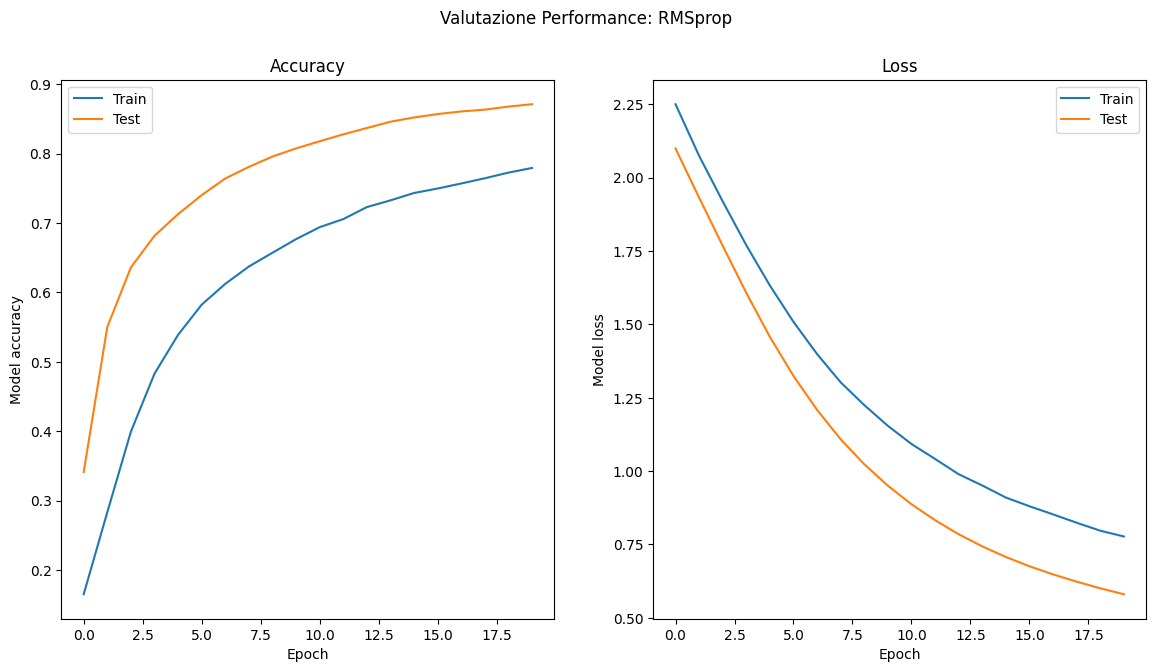

In [67]:
# look into training history
fig, ax = plt.subplots(1,2, figsize = (14, 7))

for i in range(0, 2):
    if i==0:
        # summarize history for accuracy
        ax[i].plot(acc[8])
        ax[i].plot(acc[9])
        ax[i].set_ylabel('Model accuracy')
        ax[i].set_title('Accuracy')

    else:
        # summarize history for loss
        ax[i].plot(loss[8])
        ax[i].plot(loss[9])
        ax[i].set_ylabel('Model loss')
        ax[i].set_title('Loss')

    ax[i].set_xlabel('Epoch')
    ax[i].legend(['Train', 'Test'], loc='best')

fig.suptitle("Valutazione Performance: RMSprop")
plt.show()

### Adamax

Utilizzo Adamax come metodo di ottimizzazione per 20 epoche. Ottengo allora che: <br>
$$
\begin{cases}
    T_{loss}\,=\,0.06334316730499268 \\
    T_{acc}\,=\,0.9828000068664551
\end{cases}
$$

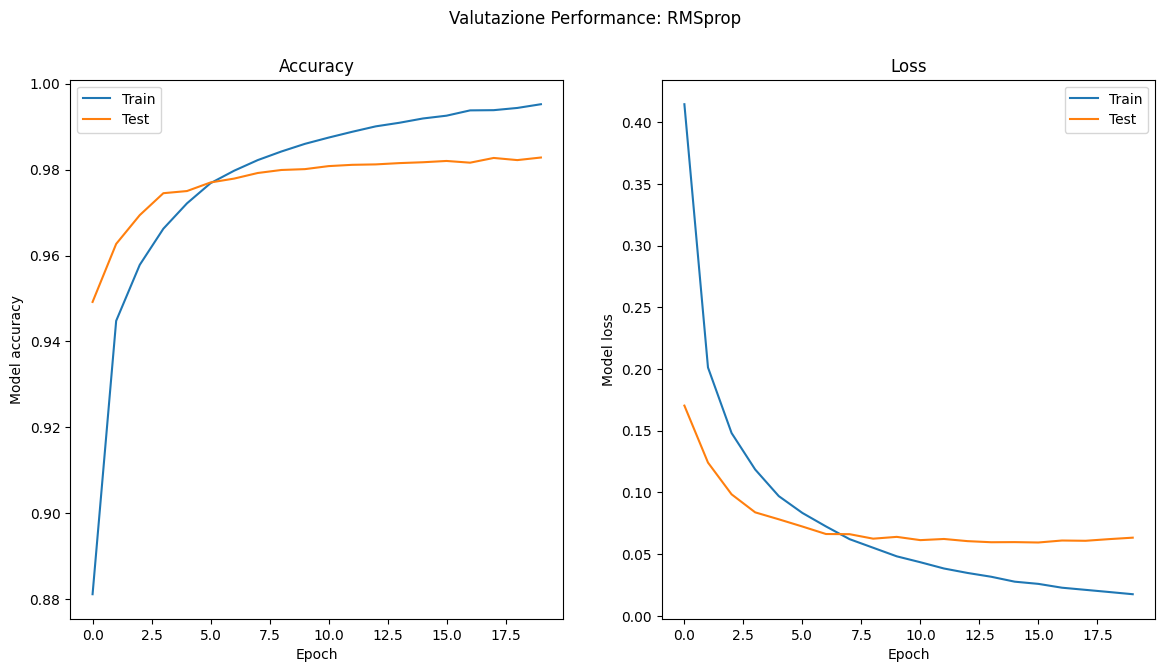

In [68]:
# look into training history
fig, ax = plt.subplots(1,2, figsize = (14, 7))

for i in range(0, 2):
    if i==0:
        # summarize history for accuracy
        ax[i].plot(acc[10])
        ax[i].plot(acc[11])
        ax[i].set_ylabel('Model accuracy')
        ax[i].set_title('Accuracy')

    else:
        # summarize history for loss
        ax[i].plot(loss[10])
        ax[i].plot(loss[11])
        ax[i].set_ylabel('Model loss')
        ax[i].set_title('Loss')

    ax[i].set_xlabel('Epoch')
    ax[i].legend(['Train', 'Test'], loc='best')

fig.suptitle("Valutazione Performance: RMSprop")
plt.show()

### Nadam

Utilizzo Nadam come metodo di ottimizzazione per 20 epoche. Ottengo allora che: <br>
$$
\begin{cases}
    T_{loss}\,=\,0.15413308143615723\\
    T_{acc}\,=\,0.9796000123023987
\end{cases}
$$

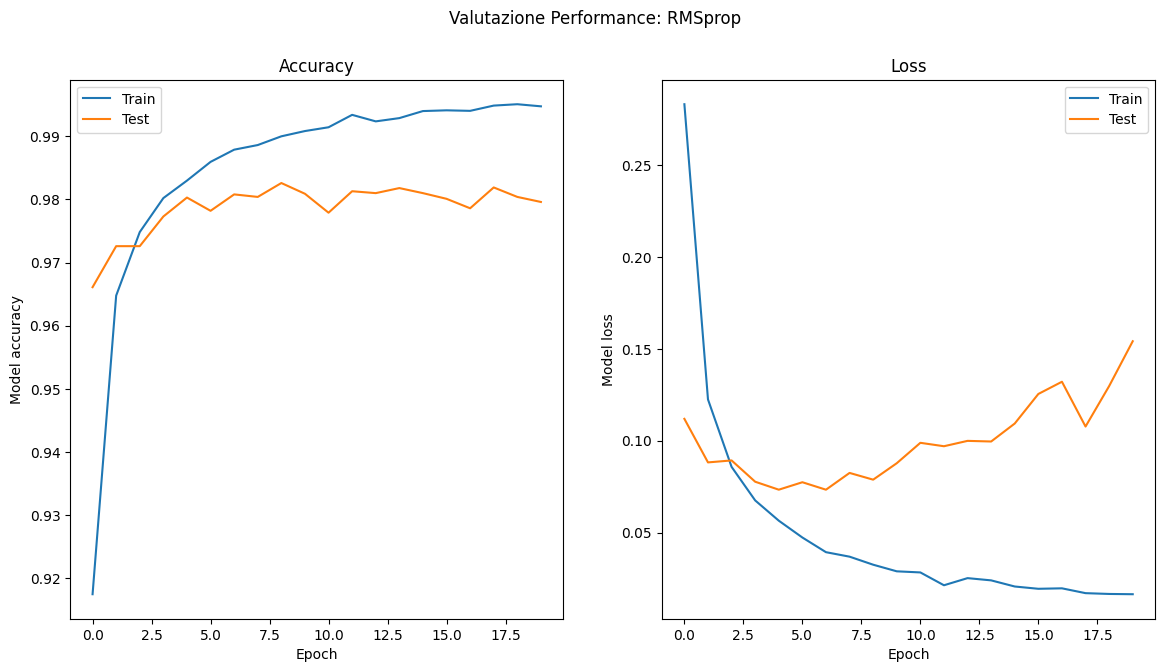

In [69]:
# look into training history
fig, ax = plt.subplots(1,2, figsize = (14, 7))

for i in range(0, 2):
    if i==0:
        # summarize history for accuracy
        ax[i].plot(acc[12])
        ax[i].plot(acc[13])
        ax[i].set_ylabel('Model accuracy')
        ax[i].set_title('Accuracy')

    else:
        # summarize history for loss
        ax[i].plot(loss[12])
        ax[i].plot(loss[13])
        ax[i].set_ylabel('Model loss')
        ax[i].set_title('Loss')

    ax[i].set_xlabel('Epoch')
    ax[i].legend(['Train', 'Test'], loc='best')

fig.suptitle("Valutazione Performance: RMSprop")
plt.show()